In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
%matplotlib inline
import seaborn as sns
fileName="bank/bank-full.csv"
path = os.path.realpath(os.curdir)
fileNameFullPath = os.path.join(path, fileName)
data_train = pd.read_csv(fileNameFullPath, na_values =['NA'])
columns = data_train.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
data_train = data_train.values
data_train = [items[0].split(';') for items in data_train]
data_train = pd.DataFrame(data_train,columns = columns)

data_train['job'] = data_train['job'].str.replace('"', '')
data_train['marital'] = data_train['marital'].str.replace('"', '')
data_train['education'] = data_train['education'].str.replace('"', '')
data_train['default'] = data_train['default'].str.replace('"', '')
data_train['housing'] = data_train['housing'].str.replace('"', '')
data_train['loan'] = data_train['loan'].str.replace('"', '')
data_train['contact'] = data_train['contact'].str.replace('"', '')
data_train['month'] = data_train['month'].str.replace('"', '')
data_train['day'] = data_train['day'].str.replace('"', '')
data_train['poutcome'] = data_train['poutcome'].str.replace('"', '')
data_train['y'] = data_train['y'].str.replace('"', '')


In [4]:
data_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data_train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='job'>

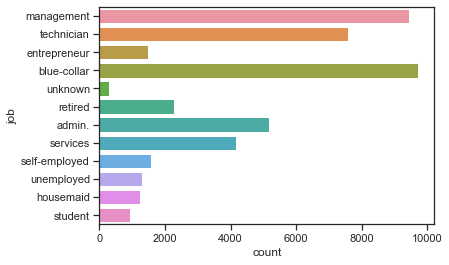

In [6]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data_train)

<AxesSubplot:xlabel='count', ylabel='job'>

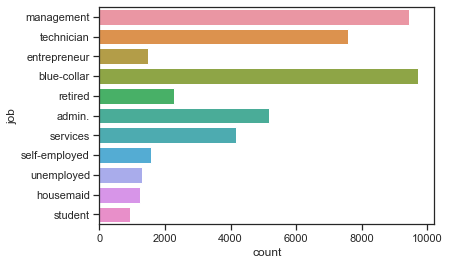

In [7]:
data_train = data_train[data_train.job != 'unknown']
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data_train)

<AxesSubplot:xlabel='count', ylabel='loan'>

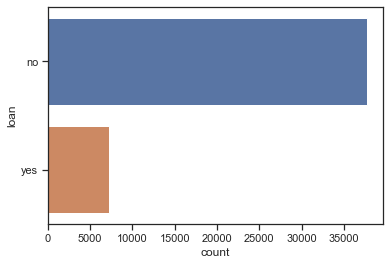

In [8]:
sns.countplot(y='loan', data=data_train)

<AxesSubplot:xlabel='count', ylabel='education'>

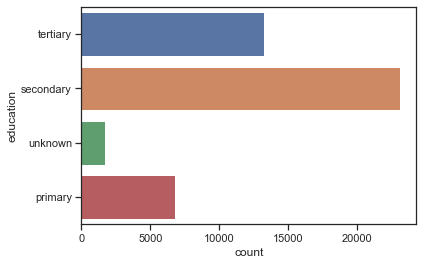

In [9]:
sns.countplot(y='education', data=data_train)

<AxesSubplot:xlabel='count', ylabel='marital'>

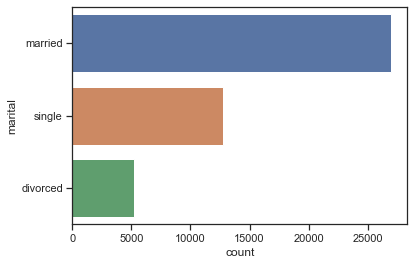

In [10]:
sns.countplot(y='marital', data=data_train)

<AxesSubplot:xlabel='count', ylabel='education'>

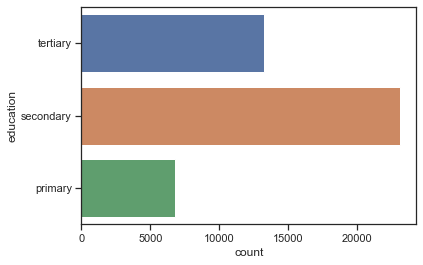

In [11]:
data_train = data_train[data_train.education != 'unknown']
sns.countplot(y='education', data=data_train)

In [12]:
list(data_train.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

<AxesSubplot:xlabel='count', ylabel='y'>

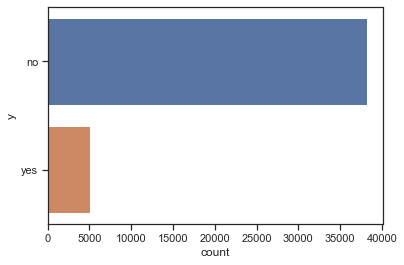

In [14]:
sns.countplot(y='y', data=data_train)

In [15]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day'] = le.fit_transform(new_df['day'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [16]:
data_train = categorize(data_train)
list(data_train.columns)
data= data_train.apply(pd.to_numeric, errors="ignore")

<AxesSubplot:xlabel='y', ylabel='duration'>

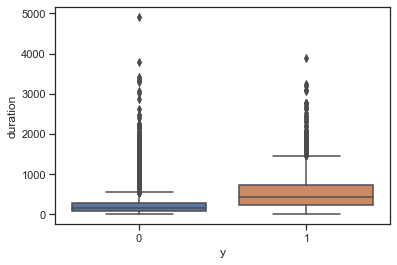

In [17]:
sns.boxplot(x='y', y='duration', data=data)

In [18]:
list(data.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

<AxesSubplot:xlabel='y', ylabel='job'>

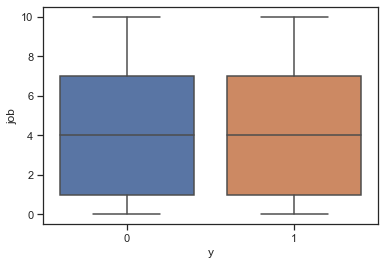

In [19]:
sns.boxplot(x='y', y='job', data=data)

In [20]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [21]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)

<AxesSubplot:xlabel='education', ylabel='count'>

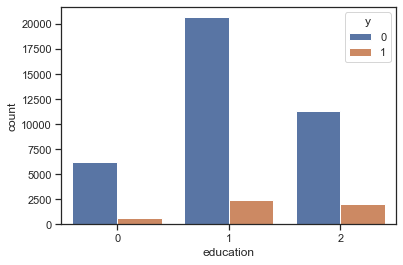

In [22]:
sns.countplot(x='education',hue='y',data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

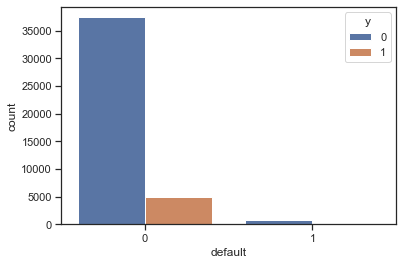

In [23]:

sns.countplot(x='default',hue='y',data=data)

In [24]:
data = data.drop('default',axis=1)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

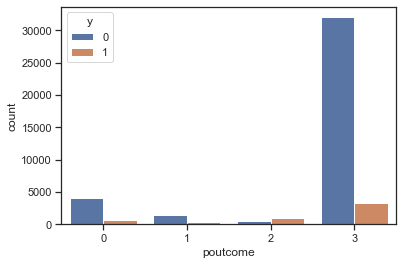

In [25]:
sns.countplot(x='poutcome',hue='y',data=data)


In [26]:

data = data.drop('poutcome',axis=1)

In [30]:
sns.countplot(x='contact',hue='y',data=data)

ValueError: Could not interpret input 'contact'

In [29]:
data = data.drop('contact',axis=1)

KeyError: "['contact'] not found in axis"

In [74]:
corr = data.corr()
print(corr)

                age       job   marital  education   balance   housing  \
age        1.000000 -0.027370 -0.403364  -0.161159  0.093062 -0.178783   
job       -0.027370  1.000000  0.058600   0.187073  0.015418 -0.114077   
marital   -0.403364  0.058600  1.000000   0.122251  0.002058 -0.013112   
education -0.161159  0.187073  0.122251   1.000000  0.069432 -0.080456   
balance    0.093062  0.015418  0.002058   0.069432  1.000000 -0.067037   
housing   -0.178783 -0.114077 -0.013112  -0.080456 -0.067037  1.000000   
loan      -0.006423 -0.028777 -0.046938  -0.028293 -0.084378  0.037004   
day       -0.018898  0.022336  0.020543   0.006711 -0.039675 -0.048396   
month     -0.044119 -0.094690 -0.007826  -0.076360  0.021969  0.273136   
duration  -0.012578 -0.000065  0.013525   0.002435  0.021176  0.005577   
campaign   0.028772  0.010362 -0.025749  -0.001504 -0.018147 -0.036560   
pdays     -0.024417 -0.023289  0.020094   0.003683  0.003928  0.124762   
previous   0.000714 -0.000477  0.01496

In [27]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        43193 non-null  float64
 1   job        43193 non-null  int64  
 2   marital    43193 non-null  int64  
 3   education  43193 non-null  int64  
 4   balance    43193 non-null  int64  
 5   housing    43193 non-null  int64  
 6   loan       43193 non-null  int64  
 7   day        43193 non-null  int64  
 8   month      43193 non-null  int64  
 9   duration   43193 non-null  float64
 10  campaign   43193 non-null  float64
 11  pdays      43193 non-null  int64  
 12  previous   43193 non-null  int64  
 13  y          43193 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 6.2 MB


In [31]:
data.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58.0,4,1,2,2143,1,0,26,8,261.0,1.0,-1,0,0
1,44.0,9,2,1,29,1,0,26,8,151.0,1.0,-1,0,0
2,33.0,2,1,1,2,1,1,26,8,76.0,1.0,-1,0,0
5,35.0,4,1,2,231,1,0,26,8,139.0,1.0,-1,0,0
6,28.0,4,2,2,447,1,1,26,8,217.0,1.0,-1,0,0


In [61]:
data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

In [65]:
sns.countplot(x=['age',hue='y',data=data)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

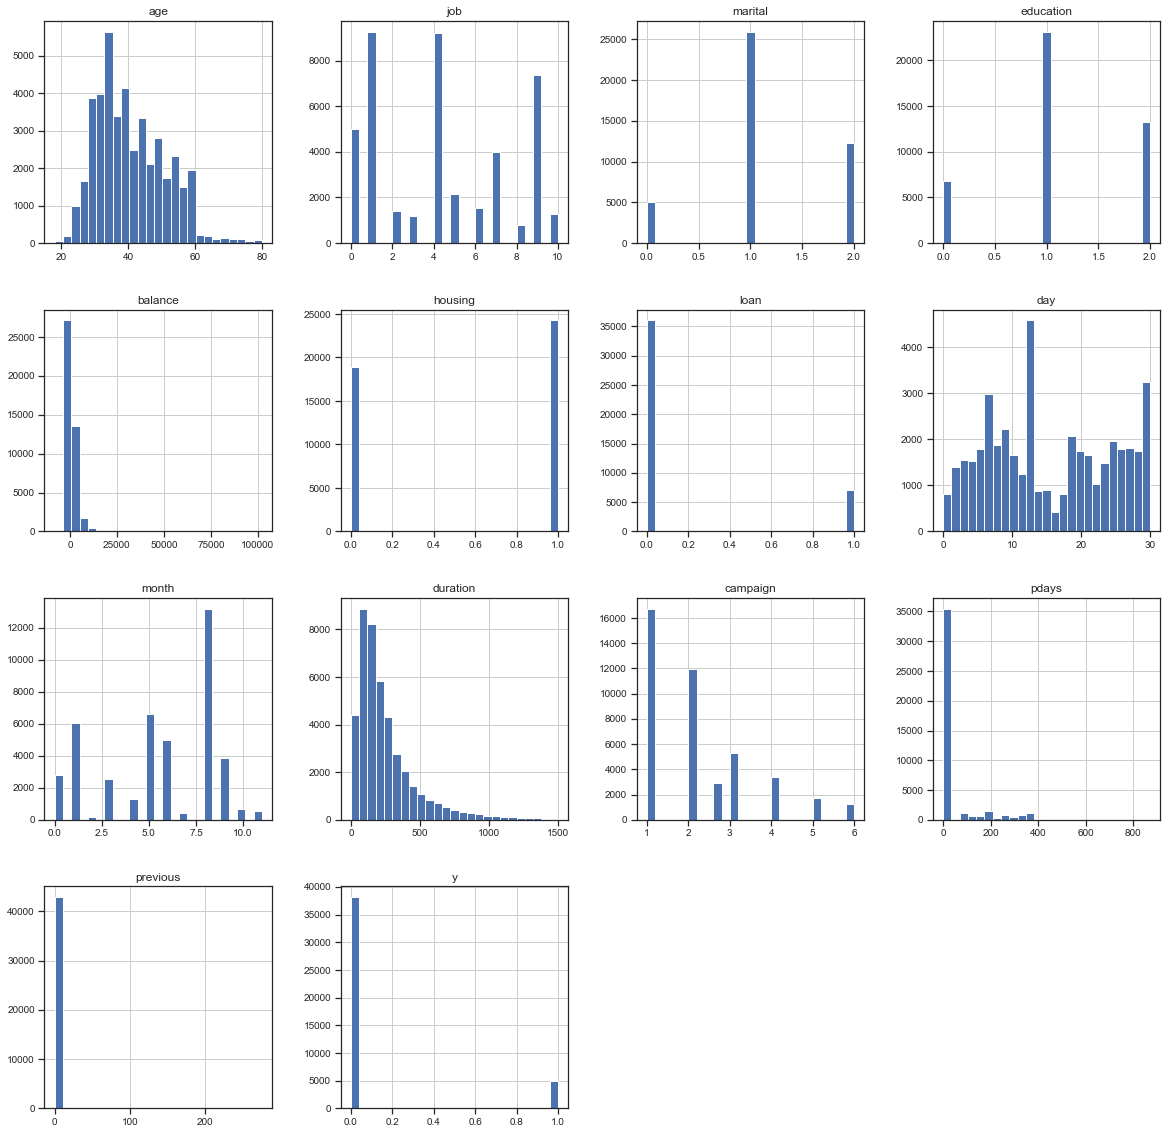

In [72]:
data.hist(figsize=(20, 20), bins=25, xlabelsize=10, ylabelsize=10);

In [42]:
corr = data.corr()
print(corr)

                age       job   marital  education   balance   housing  \
age        1.000000 -0.027370 -0.403364  -0.161159  0.093062 -0.178783   
job       -0.027370  1.000000  0.058600   0.187073  0.015418 -0.114077   
marital   -0.403364  0.058600  1.000000   0.122251  0.002058 -0.013112   
education -0.161159  0.187073  0.122251   1.000000  0.069432 -0.080456   
balance    0.093062  0.015418  0.002058   0.069432  1.000000 -0.067037   
housing   -0.178783 -0.114077 -0.013112  -0.080456 -0.067037  1.000000   
loan      -0.006423 -0.028777 -0.046938  -0.028293 -0.084378  0.037004   
day       -0.018898  0.022336  0.020543   0.006711 -0.039675 -0.048396   
month     -0.044119 -0.094690 -0.007826  -0.076360  0.021969  0.273136   
duration  -0.012578 -0.000065  0.013525   0.002435  0.021176  0.005577   
campaign   0.028772  0.010362 -0.025749  -0.001504 -0.018147 -0.036560   
pdays     -0.024417 -0.023289  0.020094   0.003683  0.003928  0.124762   
previous   0.000714 -0.000477  0.01496

<AxesSubplot:>

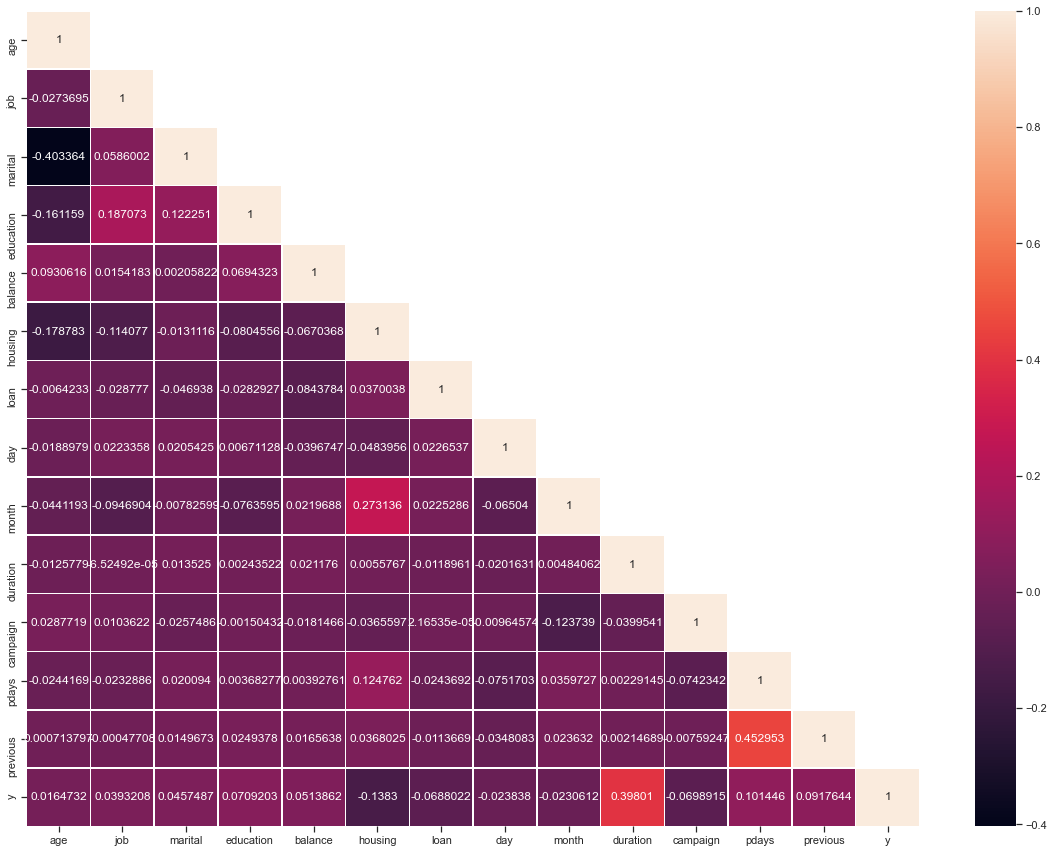

In [73]:
#sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)], 
#            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#            annot=True, annot_kws={"size": 8}, square=True);
plt.subplots(figsize=(20,15))
maskMat = np.zeros_like(corr)
for i in range(len(maskMat)):
    for j in range(i+1, len(maskMat[0])):
        maskMat[i][j] = True
sns.heatmap(corr,annot=True, mask=maskMat,linewidths=.5,fmt='g')

In [34]:
X = data.drop('y',axis = 1).values
y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_train.shape

(32394, 10)

In [35]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))


In [32]:

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

#list(names)
list(results)

LR: 0.8891460174798654
KNN: 0.88633699434744
Decison-Tree: 0.8419769190307937


[array([0.88024691, 0.90123457, 0.88703704, 0.89197531, 0.88329731,
        0.88298858, 0.89410312, 0.8897808 , 0.88761964, 0.89317691]),
 array([0.88364198, 0.88981481, 0.88580247, 0.88549383, 0.88051868,
        0.8823711 , 0.89225069, 0.88669342, 0.88885458, 0.88792837]),
 array([0.83796296, 0.84351852, 0.84012346, 0.84598765, 0.82988577,
        0.83976536, 0.85520222, 0.84655758, 0.83359061, 0.84717505])]

In [36]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [37]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [38]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.8777664598573942
Confusion Matrix : 
 [[9468   94]
 [1226   11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.93      9562
           1       0.10      0.01      0.02      1237

    accuracy                           0.88     10799
   macro avg       0.50      0.50      0.48     10799
weighted avg       0.80      0.88      0.83     10799

